In [1]:
import pandas as pd

df = pd.read_csv('gdp.csv')
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [2]:
df.shape

(11507, 4)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11507 entries, 0 to 11506
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  11507 non-null  object 
 1   Country Code  11507 non-null  object 
 2   Year          11507 non-null  int64  
 3   Value         11507 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 359.7+ KB


## Renaming 2 columns label

In [4]:
new_name = {'Country Name':'Country_Name','Country Code':'Country_Code'}
df.rename(columns = new_name,inplace = True)

In [5]:
df.head()

,Country_Name,Country_Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


## Analyzing Each Columns

In [6]:
df['Country_Name'].describe()

count                    11507
unique                     256
top       Hong Kong SAR, China
freq                        57
Name: Country_Name, dtype: object

In [7]:
df['Country_Code'].describe()

count     11507
unique      256
top         HKG
freq         57
Name: Country_Code, dtype: object

In [8]:
df['Year'].agg(['min','max'])

min    1960
max    2016
Name: Year, dtype: int64

In [9]:
df['Value'].agg(['min','max'])

min    8.824448e+06
max    7.904923e+13
Name: Value, dtype: float64

In [10]:
print('India' in df['Country_Name'].values)

True


In [11]:
print('World' in df['Country_Name'].values)

True


## 1) How many unique Countries Data we're having in the dataset?

In [12]:
df['Country_Name'].nunique()

256

## 2) How many years of Data we're having for India

In [13]:
df_temp = df[df['Country_Name']=='India']
df_temp.head(6)

,Country_Name,Country_Code,Year,Value
6074,India,IND,1960,3.653593e+10
6075,India,IND,1961,3.870910e+10
6076,India,IND,1962,4.159907e+10
6077,India,IND,1963,4.777600e+10
6078,India,IND,1964,5.572687e+10
6079,India,IND,1965,5.876042e+10


In [14]:
df_temp.shape

(57, 4)

In [15]:
df_temp['Year'].agg(['min','max'])

min    1960
max    2016
Name: Year, dtype: int64

## Analysing India

<Axes: xlabel='Year', ylabel='GDP'>

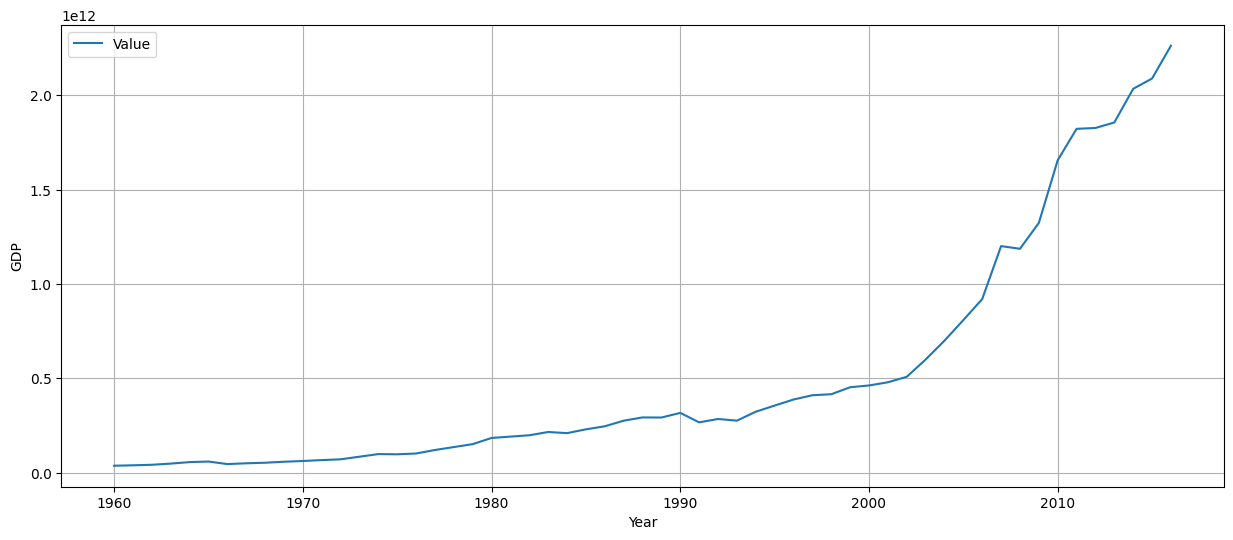

In [16]:
df_temp.plot(kind='line',x='Year',y='Value',figsize=(15,6),grid=True,xlabel="Year",ylabel="GDP")

## 3) Whats the world GDP in 1969?

In [17]:
ans = df[(df["Country_Name"]=="World") & (df["Year"]==1969)]
print(ans["Value"].values)

[2.69079771e+12]


## 4) Whats the % of GDP growth of India in Year 1994 (*as compare to 1993)?

In [18]:
gdp_1993 = df_temp[df_temp["Year"]==1993]["Value"].values[0]
gdp_1994 = df_temp[df_temp["Year"]==1994]["Value"].values[0]
print(gdp_1993,",",gdp_1994)

275570363432.31 , 322909902308.131


In [19]:
gdp_growth = (gdp_1994-gdp_1993)/gdp_1993*100
print(gdp_growth,"% growth from last year")

17.178748210146075 % growth from last year


# Tasks

### 1) Find GDP Growth of India from 1960 - 2016

In [20]:
# One way
gdp_1960 = df_temp[df_temp["Year"]==1960]["Value"].values[0]
gdp_2016 = df_temp[df_temp["Year"]==2016]["Value"].values[0]
print(gdp_1960,",",gdp_2016)

36535925029.925 , 2263792499341.01


In [21]:
gdp_growth2 = (gdp_2016-gdp_1960)/gdp_1960*100
print(gdp_growth2,"% growth of india from 1960-2016")

6096.072762594173 % growth of india from 1960-2016


### Finding GDP Growth of a INDIA

In [22]:
# Convert DataFrame to a NumPy array for row-wise access
data = df_temp.values 

# Initialize list with 0 for the first year (no growth possible without a prior year)
gdp_change = [0]

# Loop through data starting from the second row (index 1) to calculate growth percentages
for i in range(1, len(data)):
    prev = data[i-1][3]  # GDP value of the previous year (column index 3)
    curr = data[i][3]    # GDP value of the current year (column index 3)
    # Calculate percentage change: ((current - previous) / previous) * 100, rounded to 2 decimals
    gdp_change.append(round((curr - prev) / prev * 100, 2))

# Add the GDP growth percentages as a new column named 'GDP' to the DataFrame
df_temp = df_temp.assign(GDP=gdp_change)

In [23]:
df_temp.head()

,Country_Name,Country_Code,Year,Value,GDP
6074,India,IND,1960,3.653593e+10,0.00
6075,India,IND,1961,3.870910e+10,5.95
6076,India,IND,1962,4.159907e+10,7.47
6077,India,IND,1963,4.777600e+10,14.85
6078,India,IND,1964,5.572687e+10,16.64


# A Better Alternative with Pandas
### Pandas provides pct_change(), which calculates the percentage change between consecutive rows—exactly what we need. Here’s an improved version:

~~~
df_temp['GDP'] = (df_temp['Value'].pct_change() * 100).fillna(0).round(2)
~~~

### 3) Create a graph of GDP Growth of India from 1960 - 2016

<Axes: xlabel='Year', ylabel='GDP_Growth'>

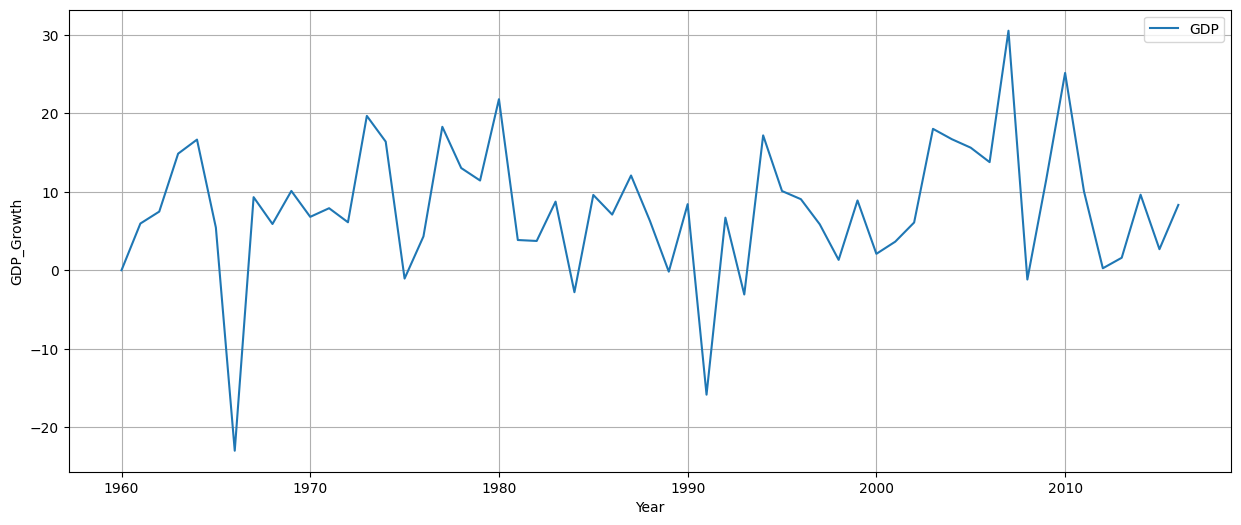

In [24]:
df_temp.plot(kind='line',x='Year',y='GDP',figsize=(15,6),grid=True,xlabel="Year",ylabel="GDP_Growth")

# Finding GDP Growth of Every country

In [25]:
# Initialize an empty list to store DataFrames for each country
final_data = []

# Iterate over each unique country name in the 'Country_Name' column
for country_name in df['Country_Name'].unique():
    # Filter the DataFrame to include only rows for the current country
    df_pr = df[df["Country_Name"] == country_name]
    
    # Convert the filtered DataFrame to a NumPy array for easier row access
    data = df_pr.values
    
    # Initialize a list for GDP growth percentages, starting with 0 for the first year
    gdp_change = [0]
    
    # Loop through the data starting from the second row to calculate growth
    for i in range(1, len(data)):
        # GDP value of the previous year (column index 3)
        prev = data[i-1][3]
        # GDP value of the current year (column index 3)
        curr = data[i][3]
        # Calculate percentage change and append it to the list
        gdp_change.append(round(((curr - prev) / prev) * 100, 2))
    
    # Add the GDP growth percentages as a new column to the country's DataFrame
    df_pr = df_pr.assign(GDP_growth = gdp_change)
    
    # Append the updated DataFrame to the final_data list
    final_data.append(df_pr)

# Concatenate all DataFrames in final_data into a single DataFrame
df = pd.concat(final_data, axis=0)

In [26]:
df

,Country_Name,Country_Code,Year,Value,GDP_growth
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


## Sort countries by there gdp Value

In [34]:
df.groupby("Country_Name")["Value"].max().sort_values(ascending = False).head(50)

Country_Name
World                                                   7.904923e+13
High income                                             5.036240e+13
OECD members                                            4.937008e+13
Post-demographic dividend                               4.673504e+13
IDA & IBRD total                                        2.948247e+13
Low & middle income                                     2.870476e+13
Middle income                                           2.829277e+13
IBRD only                                               2.739661e+13
Europe & Central Asia                                   2.365470e+13
East Asia & Pacific                                     2.248043e+13
Upper middle income                                     2.221220e+13
North America                                           2.016030e+13
Late-demographic dividend                               1.970310e+13
European Union                                          1.913667e+13
United States        